In [1]:
import pandas as pd
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../Datasets/Assignment 3/Ages.csv')
images = pkl.load(open('../../Datasets/Assignment 3/Compressed_images/Compressed_data_age_1','rb')) 

In [3]:
scaler = MinMaxScaler()
y = scaler.fit_transform(df['Age'].to_numpy().reshape(-1, 1))

In [4]:
y

array([[0.86086957],
       [0.86086957],
       [0.86086957],
       ...,
       [0.06956522],
       [0.06956522],
       [0.06956522]])

In [5]:
X_train,X_test,y_train,y_test = train_test_split(images,y,random_state=32)

In [13]:
def load_compile_model(input_shape=(3072,)):
    img_inputs_layer = keras.Input(shape=input_shape)

    output = layers.Dense(1)(img_inputs_layer)

    # Create the model
    model = tf.keras.models.Model(inputs=img_inputs_layer, outputs=output)
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse', metrics=["accuracy"])

    return model

In [14]:
model = load_compile_model()

In [15]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 3073      
                                                                 
Total params: 3,073
Trainable params: 3,073
Non-trainable params: 0
_________________________________________________________________


In [16]:
if 
model.load_weights('model_checkpoint.h5')

In [17]:
# Define the checkpoint path
checkpoint_path = "model_checkpoint.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_best_only=True)

In [18]:
history = model.fit(x=X_train,y=y_train,epochs=50,validation_split=0.1,verbose=2,callbacks=[checkpoint])

Epoch 1/50
501/501 - 1s - loss: 0.5072 - accuracy: 0.0437 - val_loss: 0.0435 - val_accuracy: 0.0562 - 962ms/epoch - 2ms/step
Epoch 2/50
501/501 - 1s - loss: 0.1465 - accuracy: 0.0379 - val_loss: 0.2172 - val_accuracy: 0.0163 - 608ms/epoch - 1ms/step
Epoch 3/50
501/501 - 1s - loss: 0.4377 - accuracy: 0.0371 - val_loss: 1.5959 - val_accuracy: 0.0022 - 580ms/epoch - 1ms/step
Epoch 4/50
501/501 - 1s - loss: 0.1297 - accuracy: 0.0407 - val_loss: 0.0551 - val_accuracy: 0.0534 - 618ms/epoch - 1ms/step
Epoch 5/50
501/501 - 1s - loss: 0.2891 - accuracy: 0.0363 - val_loss: 0.2038 - val_accuracy: 0.0096 - 527ms/epoch - 1ms/step
Epoch 6/50
501/501 - 1s - loss: 0.2826 - accuracy: 0.0379 - val_loss: 0.0933 - val_accuracy: 0.0579 - 544ms/epoch - 1ms/step
Epoch 7/50
501/501 - 1s - loss: 0.2943 - accuracy: 0.0390 - val_loss: 0.0693 - val_accuracy: 0.0551 - 549ms/epoch - 1ms/step
Epoch 8/50
501/501 - 1s - loss: 0.1742 - accuracy: 0.0401 - val_loss: 0.4172 - val_accuracy: 0.0034 - 551ms/epoch - 1ms/step


In [19]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

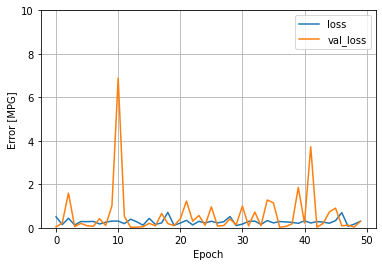

In [20]:
plot_loss(history)